In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import folium 
import json
import math
from math import radians, cos, sin, asin, sqrt
import itertools
import statistics as stats
from statistics import mean

import bokeh

print('All imported!')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row, column
from ipywidgets import interact
from bokeh.models import ColumnDataSource, FactorRange, Select, CustomJS
from bokeh.plotting import output_file, save, figure, show


output_notebook()

Loading BokehJS ...

In [ ]:
merged_data = pd.read_csv('merged_data.csv')
mdata = merged_data[merged_data.Year != 2025]
print('Data read!')

Data read!


In [ ]:
focus_crimes = [
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY']
focus_crimes.sort()
print(focus_crimes)

['ASSAULT', 'BURGLARY', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'PROSTITUTION', 'ROBBERY', 'STOLEN PROPERTY', 'VANDALISM', 'VEHICLE THEFT', 'WEAPON LAWS']


In [ ]:
# Set global font
plt.rcParams['font.family'] = 'Arial'  # Use 'sans-serif', 'monospace', 'cursive', etc.
plt.rcParams['font.size'] = 10  # Adjust font size
plt.rcParams['font.weight'] = 'normal'  # Options: 'light', 'normal', 'bold'
print('Pretty :)')

Pretty :)


In [ ]:
#saving just the needed data. looking more closely into drug/narcotic crimes.

df_drug = mdata[(mdata['Category'] == 'DRUG/NARCOTIC')].reset_index(drop=True)
print('Data has been filtered to DRUG / NARCOTIC. It is saved as df_drug.')
df_drug.head()

Data has been filtered to DRUG / NARCOTIC. It is saved as df_drug.


,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
0,DRUG/NARCOTIC,INGLESIDE,-122.441875,37.719082,2003-06-12,20:25,20,Thursday,12,June,2003
1,DRUG/NARCOTIC,TENDERLOIN,-122.414433,37.784658,2006-01-03,01:15,1,Tuesday,3,January,2006
2,DRUG/NARCOTIC,TENDERLOIN,-122.412883,37.785353,2003-12-18,00:01,0,Thursday,18,December,2003
3,DRUG/NARCOTIC,SOUTHERN,-122.413564,37.779514,2003-05-21,09:20,9,Wednesday,21,May,2003
4,DRUG/NARCOTIC,RICHMOND,-122.442365,37.784875,2006-01-27,11:59,11,Friday,27,January,2006


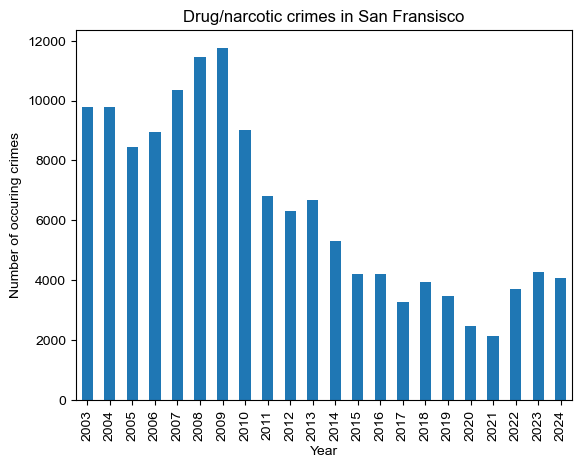

In [ ]:
#counts
counts = df_drug.value_counts('Year').reset_index().sort_values(by='Year').reset_index(drop=True)
counts.columns = ['Year', 'Count']
plot = counts.plot(x = 'Year', y= 'Count', kind = 'bar', legend = False, title = 'Drug/narcotic crimes in San Fransisco', ylabel = 'Number of occuring crimes')

In [ ]:
#prepping to calculate the statistic for my bokeh thingy

df = mdata[(mdata['Category'].isin(focus_crimes))].reset_index(drop=True)

#initiating the weekly hours to the dataset
#to count for the weekly hours, let's create a new column to the dataset with the info about the weekhour

df.loc[:,'Weekday number'] = mdata['DayOfWeek'].replace({
   'Monday': 0,
    'Tuesday':1, 
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6})

df.loc[:,'HourOfWeek'] = df['Weekday number']* 24 + df['TimeOfDay']

print('Focus crimes data has been saved as df. It includes all full years. In addition, a column for the hour of week has been added.')
df.head()

Focus crimes data has been saved as df. It includes all full years. In addition, a column for the hour of week has been added.


/var/folders/nm/8h6trdzs11b4x2t2ypm38l0w0000gn/T/ipykernel_32903/2438275899.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:,'Weekday number'] = mdata['DayOfWeek'].replace({


,Category,PdDistrict,X,Y,Date,Time,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year,Weekday number,HourOfWeek
0,ROBBERY,INGLESIDE,-122.420084,37.708311,2004-11-22,17:50,17,Monday,22,November,2004,0,17
1,VEHICLE THEFT,PARK,-120.500000,90.000000,2005-10-18,20:00,20,Tuesday,18,October,2005,1,44
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,2004-02-15,02:00,2,Sunday,15,February,2004,6,146
3,ASSAULT,SOUTHERN,-122.410541,37.770913,2010-11-21,17:00,17,Sunday,21,November,2010,4,113
4,ASSAULT,TARAVAL,-122.470366,37.745158,2013-04-02,15:50,15,Tuesday,2,April,2013,6,159


In [ ]:
#Weekly 168 h cycle
l = len(focus_crimes)
hour_counts = pd.DataFrame()

for i in range(l):
    data = df[df.Category == focus_crimes[i]]
    hour_count = data.value_counts('HourOfWeek').reset_index()
    hour_count.columns = ['HourOfWeek', focus_crimes[i]]
    hour_count = hour_count.sort_values(by = 'HourOfWeek').reset_index(drop=True)
    hour_counts[focus_crimes[i]] = hour_count[focus_crimes[i]]
hour_counts.head()

,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
0,1649,892,586,4191,208,524,115,1365,958,243
1,1496,588,351,2486,152,564,68,922,585,178
2,1279,704,273,1561,116,533,68,878,452,148
3,643,775,228,1137,76,291,43,664,346,98
4,435,765,154,772,56,223,49,454,282,84


In [ ]:
#creating the pairs for the options
other_crimes = [
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY']
pairs = [('DRUG/NARCOTIC', crime) for crime in other_crimes]
print(pairs)


[('DRUG/NARCOTIC', 'WEAPON LAWS'), ('DRUG/NARCOTIC', 'PROSTITUTION'), ('DRUG/NARCOTIC', 'ROBBERY'), ('DRUG/NARCOTIC', 'BURGLARY'), ('DRUG/NARCOTIC', 'ASSAULT'), ('DRUG/NARCOTIC', 'LARCENY/THEFT'), ('DRUG/NARCOTIC', 'VANDALISM'), ('DRUG/NARCOTIC', 'VEHICLE THEFT'), ('DRUG/NARCOTIC', 'STOLEN PROPERTY')]


In [ ]:
#defining a function to calculate R2
def get_R2(y, p):
    n = len(x)
    y_mean = 1/n * sum(y)
    SSres = sum((y-p)**2)
    SStot = sum((y-y_mean)**2)
    R2 = 1 - (SSres/SStot)

    return R2

In [ ]:
# Initial source data
source = ColumnDataSource(hour_counts)
full_data = hour_counts.to_dict(orient='list')
# Plot
p = figure(height=400, width=600, title="Compare with DRUG/NARCOTIC")
p.scatter('DRUG/NARCOTIC', 'ASSAULT', size=10, source=source)
p.xaxis.axis_label = 'DRUG/NARCOTIC'
p.yaxis.axis_label = 'selected other crime'


# Dropdown selector
select = Select(title="Compare to:", value="ASSAULT", options=other_crimes)

# JavaScript callback to update plot
select.js_on_change('value', CustomJS(args=dict(source=source, full_data=full_data), code="""
    const selected = cb_obj.value;
    source.data['y'] = full_data[selected];
    source.change.emit();
"""))

layout = column(select, p)
output_file("interactive_crime_compare.html")
show(layout)